In [1]:
from music21 import *
import mido as m

In [4]:
f = note.Note("C0")
f.show("midi")

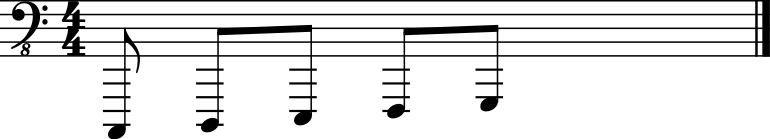

'test.mid'

In [6]:
stream1 = stream.Stream()
stream1.append(note.Note("C0", quarterLength=0.5))
stream1.append(note.Note("D0", quarterLength=0.5))
stream1.append(note.Note("E0", quarterLength=0.5))
stream1.append(note.Note("F0", quarterLength=0.5))
stream1.append(note.Note("G0", quarterLength=0.5))
stream1.show('midi')
stream1.show()
stream1.write('midi', fp='test.mid')

In [5]:
mid = m.MidiFile('test.mid')
for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
        print(msg)


Track 0: 
MetaMessage('set_tempo', tempo=500000, time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('end_of_track', time=1024)
Track 1: 
MetaMessage('track_name', name='', time=0)
pitchwheel channel=0 pitch=0 time=0
note_on channel=0 note=60 velocity=90 time=0
note_off channel=0 note=60 velocity=0 time=512
note_on channel=0 note=62 velocity=90 time=0
note_off channel=0 note=62 velocity=0 time=512
note_on channel=0 note=64 velocity=90 time=0
note_off channel=0 note=64 velocity=0 time=512
note_on channel=0 note=65 velocity=90 time=0
note_off channel=0 note=65 velocity=0 time=512
note_on channel=0 note=67 velocity=90 time=0
note_off channel=0 note=67 velocity=0 time=2048
MetaMessage('end_of_track', time=1024)


In [6]:
m.get_input_names()

['USB MIDI Interface', 'USB MIDI Interface']

In [7]:
inport = m.open_input("USB MIDI Interface")
outport = m.open_output("USB MIDI Interface")

In [8]:
# Tim's box
with m.open_output('USB MIDI Interface') as outport:
    mid = m.MidiFile('test.mid')
    for msg in mid.play():
        print(msg)
        outport.send(msg)

pitchwheel channel=0 pitch=0 time=0
note_on channel=0 note=60 velocity=90 time=0
note_off channel=0 note=60 velocity=0 time=0.25
note_on channel=0 note=62 velocity=90 time=0
note_off channel=0 note=62 velocity=0 time=0.25
note_on channel=0 note=64 velocity=90 time=0
note_off channel=0 note=64 velocity=0 time=0.25
note_on channel=0 note=65 velocity=90 time=0
note_off channel=0 note=65 velocity=0 time=0.25
note_on channel=0 note=67 velocity=90 time=0
note_off channel=0 note=67 velocity=0 time=1.0
